###  数据

- _nocache：随机数字防止缓存

- Distinct_id：类型是字符串，对用户的标识，对未登录用户，可以填充设备标识、CookieID 等，对于登录用户，则应该填充注册账号；这里的例子，我们假设是一个未注册用户，所以填充的是一个设备编号；

- event：事件名，需是合法的变量名，即不能以数字开头，且只包含：大小写字母、数字、下划线和 $； 

- properties： 这个 Event 的具体属性，以 dict 的形式存在。其中以'$'开头的表明是系统的保留字段，它的类型和中文名已经预先定义好了，自定义属性请不要以 $ 开头；同时，同一个名称的 property，在不同 event 中，必须保持一致的定义和类型。 

  *《JavaScript SDK》 https://sensorsdata.cn/manual/js_sdk.html#62-预置属性
     
     - index_leave
     - nan 
     - $pageview
     - btnClick 
     - demo_leave
     - click_send_cellphone
     - verify_cellphone_code 
     - clickSubmit
     - about_leave
     - courses_leave 
     - formSubmit 
     - page_close
     - courses_play_leave
     
- jssdk_error    
- lib: SDK类型，例如python、iOS等  
- time  
- type
     - 'track'
     - 'profile_set_once' 用户设置首次激活时间、首次注册时间等只在首次设置时有效的属性

reference: 官网文档数据格式 https://www.sensorsdata.cn/manual/data_schema.html


### 1. Read in data

In [27]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")
from pandas.io.json import json_normalize

In [28]:
filename = '/Users/zhanghaoyan/Documents/DS501/BitTiger-DS501-1702/Projects/神策数据/sensorswww_data.txt'
# import data as list of dict
ll = list()
with open(filename) as f:
    for line in f:
        try:
            l = json.loads(line, encoding='utf-8')
            ll.append(l)
        except:
            pass
result = json_normalize(ll)

In [29]:
result.to_csv('/Users/zhanghaoyan/Documents/DS501/BitTiger-DS501-1702/Projects/神策数据/sensor_data_result.csv',encoding='utf-8',index=False)

### 2. Data Preprocessing

In [53]:
df = pd.read_csv('/Users/zhanghaoyan/Documents/DS501/BitTiger-DS501-1702/Projects/神策数据/sensor_data_result.csv',encoding='utf-8')

In [31]:
df.head()

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,...,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN,1488791047953,track
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,NaN,NaN,js,code,1.6.20,NaN,NaN,zh-CN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490958296645,profile_set_once
2,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,1488791050856,track
3,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,1488791051772,track
4,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,1488791056032,track


    Convert the time into timestamp and convert it into Asia/Shanghai timezone

In [32]:
time = pd.to_datetime(df['time'],unit = 'ms',utc=True)
for i,_ in enumerate(time):
    df.loc[i,'time'] = time[i].tz_localize('UTC').tz_convert('Asia/Shanghai')

In [33]:
df.head()

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,...,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN,2017-03-06 17:04:07.953000+08:00,track
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,NaN,NaN,js,code,1.6.20,NaN,NaN,zh-CN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-31 19:04:56.645000+08:00,profile_set_once
2,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,2017-03-06 17:04:10.856000+08:00,track
3,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,2017-03-06 17:04:11.772000+08:00,track
4,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,js,code,1.6.20,chrome,56.0,NaN,...,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,2017-03-06 17:04:16.032000+08:00,track


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51048 entries, 0 to 51047
Data columns (total 70 columns):
_nocache                               51048 non-null int64
distinct_id                            51048 non-null object
event                                  44563 non-null object
jssdk_error                            33 non-null object
lib.$lib                               51048 non-null object
lib.$lib_method                        51048 non-null object
lib.$lib_version                       51048 non-null object
properties.$browser                    44563 non-null object
properties.$browser_version            44563 non-null float64
properties.$first_browser_language     6289 non-null object
properties.$first_referrer             4728 non-null object
properties.$first_referrer_host        4728 non-null object
properties.$first_visit_time           6485 non-null object
properties.$ip                         44563 non-null object
properties.$is_first_day               44563

    Drop duplicates 25 records

In [54]:
df.drop_duplicates(subset = ['_nocache'],inplace = True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51023 entries, 0 to 51047
Data columns (total 70 columns):
_nocache                               51023 non-null int64
distinct_id                            51023 non-null object
event                                  44549 non-null object
jssdk_error                            33 non-null object
lib.$lib                               51023 non-null object
lib.$lib_method                        51023 non-null object
lib.$lib_version                       51023 non-null object
properties.$browser                    44549 non-null object
properties.$browser_version            44549 non-null float64
properties.$first_browser_language     6278 non-null object
properties.$first_referrer             4722 non-null object
properties.$first_referrer_host        4722 non-null object
properties.$first_visit_time           6474 non-null object
properties.$ip                         44549 non-null object
properties.$is_first_day               44549

Only keeps columns that are intereted in analysis

In [56]:
columns = [u'distinct_id',u'event',\
           u'properties.$first_referrer',u'properties.$first_referrer_host',\
           u'properties.$referrer',u'properties.$referrer_host',\
           u'properties.$latest_referrer',u'properties.$latest_referrer_host',\
           u'properties.$first_visit_time',u'properties.$is_first_day',u'properties.$is_fist_time',\
           u'properties.$latest_utm_source',u'properties.$latest_utm_campaign',u'properties.$latest_utm_content',u'properties.$latest_utm_medium',u'properties.$latest_utm_term',\
           u'properties.$utm_source',u'properties.$utm_campaign', u'properties.$utm_content', u'properties.$utm_medium', u'properties.$utm_term',
           u'properties.$title',u'properties.$url',u'properties.$url_path',\
           u'properties._session_from_url', u'properties._session_referrer', u'properties._session_referrer_domain',u'properties._session_referrer_host',\
           u'properties.isSuccess', u'properties.name', u'properties.page',\
           u'properties.pagePosition', u'properties.pageStayTime',u'properties.project_name',\
           u'properties.requestBtn', u'time',u'type'
           ]
df = df.loc[:,columns]

In [57]:
df.to_csv('/Users/zhanghaoyan/Documents/DS501/BitTiger-DS501-1702/Projects/神策数据/sensor_data.csv',encoding='utf-8',index=False)

In [58]:
df.columns

Index([u'distinct_id', u'event', u'properties.$first_referrer',
       u'properties.$first_referrer_host', u'properties.$referrer',
       u'properties.$referrer_host', u'properties.$latest_referrer',
       u'properties.$latest_referrer_host', u'properties.$first_visit_time',
       u'properties.$is_first_day', u'properties.$is_fist_time',
       u'properties.$latest_utm_source', u'properties.$latest_utm_campaign',
       u'properties.$latest_utm_content', u'properties.$latest_utm_medium',
       u'properties.$latest_utm_term', u'properties.$utm_source',
       u'properties.$utm_campaign', u'properties.$utm_content',
       u'properties.$utm_medium', u'properties.$utm_term',
       u'properties.$title', u'properties.$url', u'properties.$url_path',
       u'properties._session_from_url', u'properties._session_referrer',
       u'properties._session_referrer_domain',
       u'properties._session_referrer_host', u'properties.isSuccess',
       u'properties.name', u'properties.page', u'pr

### 3. Data Inspection

In [40]:
df = pd.read_csv('/Users/zhanghaoyan/Documents/DS501/BitTiger-DS501-1702/Projects/神策数据/sensor_data.csv',encoding='utf-8')

In [41]:
df.head()

,distinct_id,event,properties.$first_referrer,properties.$first_referrer_host,properties.$referrer,properties.$referrer_host,properties.$latest_referrer,properties.$latest_referrer_host,properties.$first_visit_time,properties.$is_first_day,...,properties._session_referrer_host,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.project_name,properties.requestBtn,time,type
0,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,www.baidu.com,NaN,NaN,NaN,2.0,5.692,NaN,NaN,2017-03-06 17:04:07.953000+08:00,track
1,9939d3e087bca29c42334d96dccd25ca0e06652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-06 17:04:10.999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-31 19:04:56.645000+08:00,profile_set_once
2,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-06 17:04:10.856000+08:00,track
3,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,request,index,NaN,NaN,NaN,2.0,2017-03-06 17:04:11.772000+08:00,track
4,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,request,index,NaN,NaN,NaN,2.0,2017-03-06 17:04:16.032000+08:00,track


Not all visitor have pageview action, whihc means that there are users with imcomplete records.

There are new visit users with type set_profile_once (6479 user 6481 recods)  and users visited the site before data-collected time.

In [59]:
users = df['distinct_id'].unique()
new_users = df.loc[(df['type']=='profile_set_once'),'distinct_id'].unique()
users.size,new_users.size

(8254, 6474)

In [60]:
pageview_user = df.loc[(df['event']=='$pageview'),'distinct_id'].unique()
pageview_user.size

8116

In [61]:
df_new_users = df.loc[df['distinct_id'].isin(new_users),:]
df_new_users.to_csv('/Users/zhanghaoyan/Documents/DS501/BitTiger-DS501-1702/Projects/神策数据/sensor_data_new_user.csv',encoding='utf-8',index=False)

In [66]:
df_new_users.loc[(df['event']=='$pageview'),'distinct_id'].unique().size

6438

In [92]:
###### There are 35 new users have no pageview activity
users_with_no_pageview = new_users[np.in1d(new_users,pageview_user,assume_unique=True)==False]
users_with_one_record = df_new_users.groupby('distinct_id')['distinct_id'].count().index[df_new_users.groupby('distinct_id')['distinct_id'].count() == 1]
df_new_users.loc[df_new_users['distinct_id'].isin(users_with_one_record),:]
users_with_one_record.size, users_with_no_pageview.size

(35, 36)

    The flow of success register is as follow:
    Pageview -> button click -> click request button -> form submit点击提交表单 -> is success

#### Each steps' user size:

In [76]:
pageview_user = df_new_users.loc[(df_new_users['event']=='$pageview'),'distinct_id'].unique()
click_button_user = df_new_users.loc[(df_new_users['event']=='btnClick'),'distinct_id'].unique()
click_request_button_user = df_new_users.loc[(df_new_users['event']=='btnClick')&(df_new_users['properties.name']=='request'),'distinct_id'].unique()
form_submit_user = df_new_users.loc[(df_new_users['event']=='formSubmit'),'distinct_id'].unique()
form_submit_success_user = df_new_users.loc[(df_new_users['event']=='formSubmit')&(df_new_users['properties.isSuccess']==True),'distinct_id'].unique()
user_sizes = pageview_user.size,click_button_user.size,click_request_button_user.size,form_submit_user.size,\
 form_submit_success_user.size
print user_sizes

(6438, 2423, 1222, 278, 255)


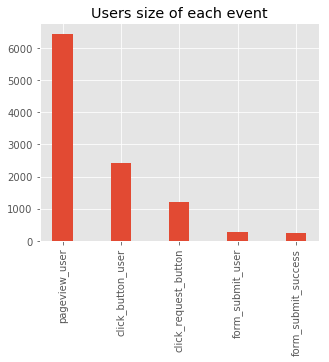

In [77]:
fig, axes = plt.subplots(1, 1, figsize=(5,4))
axes.bar(xrange(len(user_sizes)),user_sizes,width = 0.35)
axes.set_title("Users size of each event")
axes.set_xticklabels(labels=['','pageview_user','click_button_user','click_request_button','form_submit_user','form_submit_success'],rotation=90)

Each users' record number

In [80]:
df_only_pageview_user = df_new_users[df_new_users['distinct_id'].isin(pageview_user) & np.logical_not(df_new_users['distinct_id'].isin(click_button_user))]
df_request_user = df_new_users[df_new_users['distinct_id'].isin(click_request_button_user) & np.logical_not(df_new_users['distinct_id'].isin(form_submit_user))]
df_click_button_user =  df_new_users[df_new_users['distinct_id'].isin(click_button_user) & np.logical_not(df_new_users['distinct_id'].isin(click_request_button_user))]
df_form_submit_user = df_new_users[df_new_users['distinct_id'].isin(form_submit_user)]

def number_of_record(df,number):
    return (df['distinct_id'].value_counts() == number).sum()

def table(df):
    x = []; y = []
    for i in df['distinct_id'].value_counts().unique():
        x = np.append(x,i)
        y = np.append(y,number_of_record(df,i))
        n = df['distinct_id'].value_counts().shape[0]
        df_record = pd.DataFrame(list(zip(x.astype(int), y.astype(int), y/n))).sort_values(by=[0], ascending=True)
    df_record.columns = ['number of count', 'number of users', 'percent of all users']
    return df_record

In [91]:
table(df_new_users)[:10]

,number of count,number of users,percent of all users
70,1,35,0.005406
69,2,1806,0.278962
68,3,2029,0.313407
67,4,506,0.078159
66,5,459,0.070899
65,6,251,0.038770
64,7,187,0.028885
63,8,151,0.023324
62,9,144,0.022243
61,10,104,0.016064


In [94]:
# There are 36 users with no pageview but only 35 users have one records?
# There is a unusual new user with only one record of index_leave 
one_record = (df_new_users['distinct_id'].value_counts() == 1).index[(df_new_users['distinct_id'].value_counts() == 1) == True]
no_pageview = users_with_no_pageview[np.in1d(users_with_no_pageview,a,assume_unique=True)==False]
df_new_users.loc[df_new_users['distinct_id']==no_pageview[0],:]

,distinct_id,event,properties.$first_referrer,properties.$first_referrer_host,properties.$referrer,properties.$referrer_host,properties.$latest_referrer,properties.$latest_referrer_host,properties.$first_visit_time,properties.$is_first_day,...,properties._session_referrer_host,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.project_name,properties.requestBtn,time,type
11274,395aa9f7438034ede69880308d38047adbfc3410,index_leave,NaN,NaN,NaN,NaN,https://www.baidu.com/baidu.php,www.baidu.com,NaN,True,...,www.baidu.com,NaN,NaN,NaN,1.0,2.973,NaN,NaN,1488879785724,track
11275,395aa9f7438034ede69880308d38047adbfc3410,NaN,https://www.baidu.com/baidu.php,www.baidu.com,NaN,NaN,NaN,NaN,2017-03-07 17:43:07.806,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490958311834,profile_set_once


(1, 30)

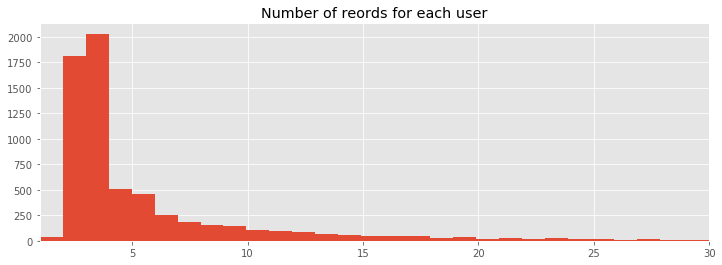

In [82]:
# A histogram
n = df_new_users['distinct_id'].value_counts()
fig, axes = plt.subplots(figsize=(12,4))

axes.hist(n,bins=max(n))
axes.set_title("Number of reords for each user")
axes.set_xlim((min(n), 30))

In [90]:
table(df_only_pageview_user)

,number of count,number of users,percent of all users
12,2,1805,0.449564
11,3,1921,0.478456
10,4,91,0.022665
9,5,129,0.032130
8,6,26,0.006476
7,7,26,0.006476
6,8,3,0.000747
5,9,8,0.001993
4,10,2,0.000498
3,11,1,0.000249


In [84]:
# table(df_click_button_user)

In [85]:
# table(df_request_user)

In [86]:
# table(df_form_submit_user)

(2, 32)

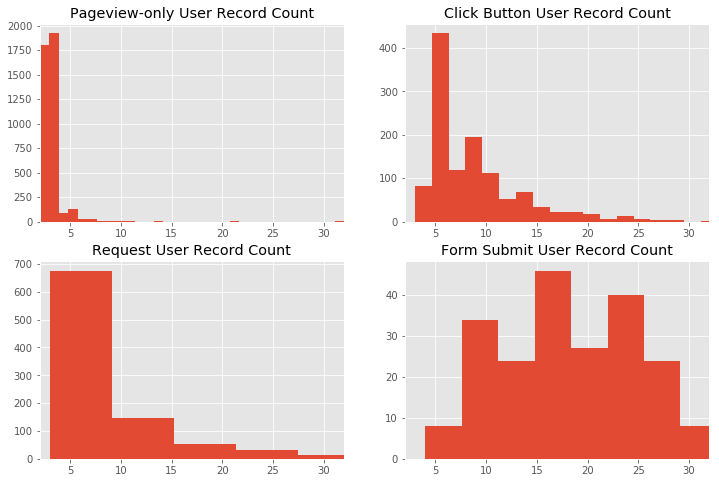

In [88]:
n = df_only_pageview_user['distinct_id'].value_counts()
n1 = df_click_button_user['distinct_id'].value_counts()
n2 = df_request_user['distinct_id'].value_counts()
n3 = df_form_submit_user['distinct_id'].value_counts()

fig, axes = plt.subplots(2,2,figsize=(12,8))

axes[0][0].hist(n,bins=max(n))
axes[0][0].set_title("Pageview-only User Record Count")
axes[0][0].set_xlim((min(n), max(n)))

axes[0][1].hist(n1,bins=max(n))
axes[0][1].set_title("Click Button User Record Count")
axes[0][1].set_xlim((min(n), max(n)))

axes[1][0].hist(n2,bins=max(n))
axes[1][0].set_title("Request User Record Count")
axes[1][0].set_xlim((min(n), max(n)))

axes[1][1].hist(n3,bins=max(n))
axes[1][1].set_title("Form Submit User Record Count")
axes[1][1].set_xlim((min(n), max(n)))

In [89]:
n.median(),n1.median(),n2.median(),n3.median()

(3.0, 7.0, 5.0, 21.5)

User's set profile once information

In [110]:
df_profile = df_new_users[df_new_users['type']=='profile_set_once']
# df_profile['distinct_id'].value_counts().index[df_profile['distinct_id'].value_counts()>1]
# df_profile.drop(labels=[44239,44243],inplace=True)
df_profile.shape

(6474, 37)

In [156]:
df_profile=df_profile.loc[:,['distinct_id','properties.$first_referrer','properties.$first_referrer_host','properties.$first_visit_time',\
          'properties.$utm_source','properties.$utm_campaign','properties.$utm_content','properties.$utm_medium',\
          'properties.$latest_utm_term','time']]

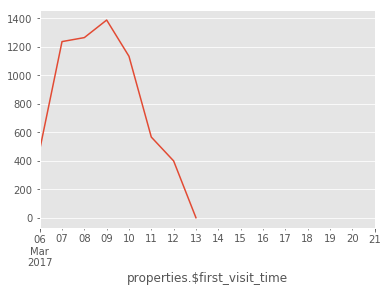

In [143]:
cond = pd.to_datetime(df_profile['properties.$first_visit_time'])>'2017-03-06'
df_timestamp =pd.DataFrame((pd.to_datetime(df_profile.loc[cond,'properties.$first_visit_time']).copy()))
df_timestamp = df_timestamp.set_index('properties.$first_visit_time')
df_timestamp['count'] = 1
df_timestamp['count'].resample("1D").sum().plot()

In [157]:
df_profile.isnull().sum()

distinct_id                           0
properties.$first_referrer         1752
properties.$first_referrer_host    1752
properties.$first_visit_time          0
properties.$utm_source             2252
properties.$utm_campaign           2278
properties.$utm_content            2311
properties.$utm_medium             2277
properties.$latest_utm_term        6474
time                                  0
dtype: int64